**California housing dataset**

Importing lllibraries

In [1]:
'''importing packages required'''

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Load Dataset

In [2]:
# Load dataset
df = pd.read_csv("housing.csv")

In [3]:
# View first 5 rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Data Cleaning

In [4]:
# Check shape
df.shape

(20640, 10)

In [5]:
# Check missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
# Remove duplicates if any
df = df.drop_duplicates()

EDA

In [8]:
# Basic statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# Target distribution
df['median_house_value'].value_counts()


median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
34200.0       1
46200.0       1
352000.0      1
307900.0      1
385200.0      1
Name: count, Length: 3842, dtype: int64

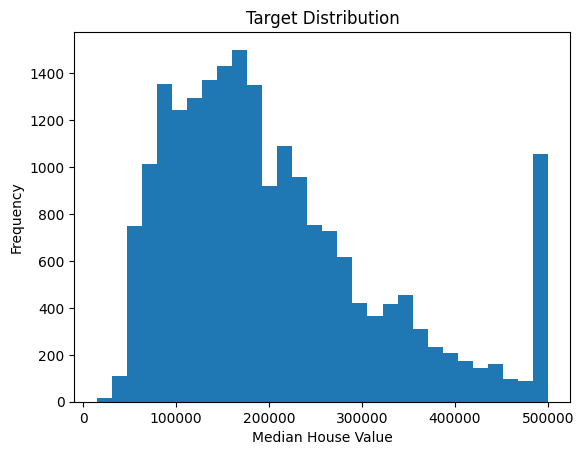

In [10]:
#plot target distribution(histogram)
import matplotlib.pyplot as plt

plt.hist(df['median_house_value'], bins=30)
plt.title("Target Distribution")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

Preprocessing

In [11]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

print(num_cols)
print(cat_cols)

NameError: name 'X' is not defined

In [ ]:
#Encode categorical feature
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [ ]:
#Apply StandardScaler only to numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

In [ ]:
#Final Check
X_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,False,False,True,False
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,False,False,True,False
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,False,False,True,False
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,False,False,True,False
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,False,False,True,False


Separate input features (X) and target variable (y)

In [12]:
# Input features
X = df.drop("median_house_value", axis=1)

# Target variable
y = df["median_house_value"]

print(type(y), y.dtype)

<class 'pandas.core.series.Series'> float64


Confirmed: y is a continuous numeric variable, suitable for Linear Regression.

In [13]:
#One-Hot Encode categorical feature
X_encoded = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

Split data into Train and Test

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 12) (4128, 12) (16512,) (4128,)


- Training data → learn patterns
- Testing data → evaluate unseen performance

In [15]:
#Scale numerical features
from sklearn.preprocessing import StandardScaler

num_cols = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Train Linear Regression model

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Predict & create comparison table

In [17]:
X_test.isna().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [18]:
#Impute missing values
from sklearn.impute import SimpleImputer

# Identify numerical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Imputer
imputer = SimpleImputer(strategy='mean')

# Fit on training data
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])

# Transform test data
X_test[num_cols] = imputer.transform(X_test[num_cols])

In [19]:
y_pred = model.predict(X_test)

In [20]:
# Comparison table
comparison = pd.DataFrame({
    "Actual Value": y_test.values[:10],
    "Predicted Value": y_pred[:10]
})

comparison

,Actual Value,Predicted Value
0,47700.0,64693.827615
1,45800.0,134863.717653
2,500001.0,266127.758208
3,218600.0,278640.810285
4,278000.0,273407.813532
5,158700.0,150244.682672
6,198200.0,301303.802630
7,157500.0,238903.255091
8,340000.0,267145.164326
9,446600.0,418562.237151


Evaluate model using MAE & RMSE

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 50702.16891030992
RMSE: 70031.48789947941


Predicted vs Actual scatter plot

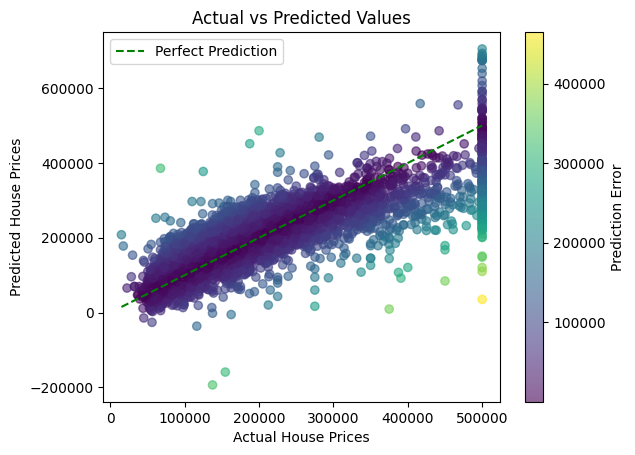

In [22]:
import matplotlib.pyplot as plt

errors = abs(y_test - y_pred)

plt.scatter(y_test, y_pred, c=errors, cmap='viridis', alpha=0.6)
plt.colorbar(label='Prediction Error')

# Perfect prediction reference line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='green',
    linestyle='--',
    label='Perfect Prediction'
)

plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

Interpret model coefficients

In [23]:
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
})

coefficients_sorted = coefficients.sort_values(
    by="Coefficient",
    ascending=False
)

coefficients_sorted

,Feature,Coefficient
9,ocean_proximity_ISLAND,136125.072615
7,median_income,75167.774766
4,total_bedrooms,43068.181842
6,households,18382.196324
2,housing_median_age,13889.866189
11,ocean_proximity_NEAR OCEAN,3431.140073
10,ocean_proximity_NEAR BAY,-5136.642217
3,total_rooms,-13094.251162
8,ocean_proximity_INLAND,-39786.656161
5,population,-43403.432427
